[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mig999/FalseGreenBeardEvolutionaryGame/blob/main/False_Beards_Simulation.ipynb)

# Moran process for false green beards

### Basic Prisioners Dilemma

In [ ]:
import random
import matplotlib.pyplot as plt

population_size = 10000
mutation_chance = 0.001

# Strategies (Cooperate = 0, Defect = 1)
cooperate = 0
defect = 1

# Payoff matrix
payoff = [[3, 0], [5, 1]]  # [R, S, T, P] = [3, 0, 5, 1]

# Initialize population with random strategies
population = [random.choice([cooperate, defect]) for _ in range(population_size)]

def calculate_fitness(strategy):
    """
    Calculates the fitness of a strategy based on the payoff matrix.
    """
    fitness = 0
    for opponent in population:
        fitness += payoff[strategy][opponent]
    return fitness

def select_parent():
    """
    Selects a parent based on fitness-proportional selection.
    """
    fitness_values = [calculate_fitness(strategy) for strategy in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    return random.choices(population, probabilities)[0]

def mutate(strategy):
    """
    Mutates a strategy with a given mutation chance.
    """
    if random.random() < mutation_chance:
        return cooperate if strategy == defect else defect
    return strategy

def plot_evolution(generations):
    """
    Plots the evolution of the Moran process over generations.
    """
    cooperate_freqs = []
    defect_freqs = []

    for generation in range(generations):
        cooperate_freq = population.count(cooperate) / population_size
        defect_freq = population.count(defect) / population_size

        cooperate_freqs.append(cooperate_freq)
        defect_freqs.append(defect_freq)

        parent = select_parent()
        offspring = mutate(parent)
        population[random.randint(0, population_size - 1)] = offspring

    # Plot the frequencies of cooperate and defect strategies
    plt.plot(range(generations), cooperate_freqs, label='Cooperate')
    plt.plot(range(generations), defect_freqs, label='Defect')
    plt.xlabel('Generation')
    plt.ylabel('Frequency')
    plt.title('Evolution of Moran Process')
    plt.legend()
    plt.show()

# Example usage: plot the evolution over 100 generations
plot_evolution(100)

### Moran process without tags

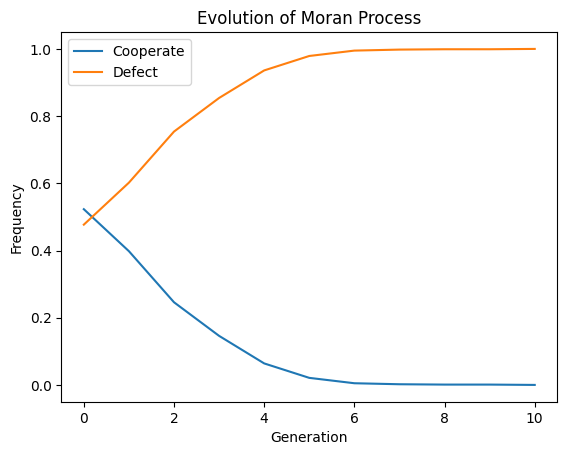

Cooperate frequency: 0.0
Defect frequency: 1.0


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

population_size = 1000
mutation_chance = 0.001
r = 0.1

# Strategies (Cooperate = 0, Defect = 1)
cooperate = 0
defect = 1

# Payoff matrix
payoff = [[3, 0], [5, 1]]  # [R, S, T, P] = [3, 0, 5, 1]
#payoff = [[4, 0], [4, 0]]  # [R, S, T, P] = [4, 0, 4, 1] ¿snow drift?

diagonal = np.array(payoff).diagonal()
diagonal = np.identity(len(diagonal))*diagonal
shiftpayoff = np.dot(diagonal,np.ones_like(diagonal))

payoffupdate = (np.array(payoff)*(1-r)) + (shiftpayoff*r)

# Initialize population with random strategies
population = [random.choice([cooperate, defect]) for _ in range(population_size)]

def calculate_fitness(strategy):
    """
    Calculates the fitness of a strategy based on the payoff matrix.
    """
    fitness = 0
    for opponent in population:
        #fitness += payoff[strategy][opponent]
        fitness += payoffupdate[strategy][opponent]
    return fitness

def select_parent(population):
    """
    Selects a parent based on fitness-proportional selection.
    """
    fitness_values = [calculate_fitness(strategy) for strategy in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    return [random.choices(population, probabilities)[0] for i in range(population_size)]

def mutate(strategy):
    """
    Mutates a strategy with a given mutation chance.
    """
    if random.random() < mutation_chance:
        return cooperate if strategy == defect else defect
    return strategy

def plot_evolution(generations):
    """
    Plots the evolution of the Moran process over generations.
    """
    cooperate_freqs = []
    defect_freqs = []

    for generation in generations:
        cooperate_freq = generation.count(cooperate) / population_size
        defect_freq = generation.count(defect) / population_size

        cooperate_freqs.append(cooperate_freq)
        defect_freqs.append(defect_freq)

        #parent = select_parent()
        #offspring = mutate(parent)
        #population[random.randint(0, population_size - 1)] = offspring

    # Plot the frequencies of cooperate and defect strategies
    plt.plot(range(num_generations+1), cooperate_freqs, label='Cooperate')
    plt.plot(range(num_generations+1), defect_freqs, label='Defect')
    plt.xlabel('Generation')
    plt.ylabel('Frequency')
    plt.title('Evolution of Moran Process')
    plt.legend()
    plt.show()


# Run the Moran process for a given number of generations
num_generations = 10

generations = [population]

for generation in range(num_generations):
    parent = select_parent(population)
    #print(parent)
    offspring = mutate(parent)
    #print(offspring)
    population = offspring
    generations.append(population)


plot_evolution(generations)

# Calculate the final frequencies of cooperate and defect strategies
cooperate_frequency = population.count(cooperate) / population_size
defect_frequency = population.count(defect) / population_size

print("Cooperate frequency:", cooperate_frequency)
print("Defect frequency:", defect_frequency)

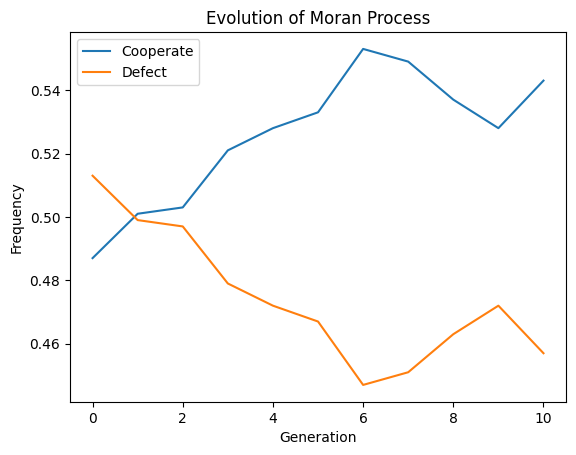

Cooperate frequency: 0.543
Defect frequency: 0.457


In [ ]:
population_size = 1000
mutation_chance = 0.001
r = 0.45

# Strategies (Cooperate = 0, Defect = 1)
cooperate = 0
defect = 1

# Payoff matrix
payoff = [[3, 0], [5, 1]]  # [R, S, T, P] = [3, 0, 5, 1]
#payoff = [[4, 0], [4, 0]]  # [R, S, T, P] = [4, 0, 4, 1] ¿snow drift?

diagonal = np.array(payoff).diagonal()
diagonal = np.identity(len(diagonal))*diagonal
shiftpayoff = np.dot(diagonal,np.ones_like(diagonal))

payoffupdate = (np.array(payoff)*(1-r)) + (shiftpayoff*r)

# Initialize population with random strategies
population = [random.choice([cooperate, defect]) for _ in range(population_size)]

# Run the Moran process for a given number of generations
num_generations = 10

generations = [population]

for generation in range(num_generations):
    parent = select_parent(population)
    #print(parent)
    offspring = mutate(parent)
    #print(offspring)
    population = offspring
    generations.append(population)


plot_evolution(generations)

# Calculate the final frequencies of cooperate and defect strategies
cooperate_frequency = population.count(cooperate) / population_size
defect_frequency = population.count(defect) / population_size

print("Cooperate frequency:", cooperate_frequency)
print("Defect frequency:", defect_frequency)

In [ ]:
def select_parent(population):
    """
    Selects a parent based on fitness-proportional selection.
    """
    fitness_values = [calculate_fitness(strategy) for strategy in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    print(probabilities)
    return [random.choices(population, probabilities)[0] for i in range(population_size)]

print(select_parent(population))

[0.10852713178294573, 0.10852713178294573, 0.10852713178294573, 0.10852713178294573, 0.10852713178294573, 0.10852713178294573, 0.10852713178294573, 0.10852713178294573, 0.023255813953488372, 0.10852713178294573]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


### Definitive version

In [ ]:
import random
import math
# Strategies (Cooperate = 0, Defect = 1)
cooperate = 0
defect = 1
# Tags (Cooperate = 0, Defect = 1)
tag0 = 0
tag1 = 1

payoff = [[3, 0], [5, 1]]  # [R, S, T, P] = [3, 0, 5, 1]

#Intensity of selection
#intensityofselection = 0.5

def randomIndividual():
  x = Individual()
  x.randominit()
  return x

class Individual():
  def __init__(self, tag = 0, strategies = [0,0]):
    self.tag = tag
    self.strategies = strategies

  def randominit(self):
    self.tag = random.choice([tag0, tag1])
    self.strategies = [random.choice([cooperate, defect]),random.choice([cooperate, defect])]

def fitnessOfEncounter(ind1, ind2, payoff):
  return payoff[ind1.strategies[ind2.tag]][ind2.strategies[ind1.tag]]

def fitnessOfGeneration(population,payoff): #Without testing
  fitness_values = []
  for i in range(len(population)):
    if i % 2 == 0:
      fitness_values.append(fitnessOfEncounter(population[i],population[i+1],payoff))
    else:
      fitness_values.append(fitnessOfEncounter(population[i],population[i-1],payoff))
  return fitness_values

def regularizeProbabilities(fitness_values,intensityselection): #This regularize the probabilities with the intensity of selection
  fitness_values = [math.exp(intensityselection*fitness) for fitness in fitness_values]
  total_fitness = sum(fitness_values)
  probabilities = [fitness / total_fitness for fitness in fitness_values]
  return probabilities


def mutatePopulation(population,mutationrate):
    """
    Mutates a strategy with a given mutation chance.
    """
    for i in range(len(population)):
      if random.random() < mutationrate:
          population[i] = randomIndividual()

    return population

def countPopulation(population):
  total = [0,0,0,0,0,0,0,0]
  for individual in population:
    index = individual.tag * 4 + individual.strategies[0] * 2 + individual.strategies[1]
    total[index] += 1

  return total

def countCronology(cronology, maxpop):
  total = [0,0,0,0,0,0,0,0]
  for timestep in cronology:
    for i in range(len(timestep)):
      total[i] += timestep[i]
  totalsum = sum(total)
  for i in range(len(total)):
    total[i] = (total[i]/totalsum)*maxpop
  return total

def newGeneration(initialpopulation,mutationrate,r,intensityselection,payoff):
  fitness_values = fitnessOfGeneration(initialpopulation,payoff)
  probabilities = regularizeProbabilities(fitness_values,intensityselection)
  new_population = random.choices(initialpopulation, probabilities, k=len(initialpopulation))
  for i in range(len(new_population)):
    if i % 2 != 0 and random.random() < r:
      new_population[i] = new_population[i-1]
    """
    if i % 2 != 0:
      x = random.choices([0,1],weights=[1-r,r])[0]
      if x == 1:
        new_population[i] = new_population[i-1]
        """
  new_population = mutatePopulation(new_population,mutationrate)
  return new_population

def runSimulation(popsize,mutationrate,r,intensityselection,payoff,maxgeneration):
  #Popsize has to always be an even number
  if popsize % 2 != 0:
    popsize += 1
  #Initialize
  population = [randomIndividual() for _ in range(popsize)]
  cronology = [countPopulation(population)]
  for _ in range(maxgeneration):
    newgeneration = newGeneration(population,mutationrate,r,intensityselection,payoff)
    cronology.append(countPopulation(newgeneration))
    population = newgeneration
  return cronology


In [ ]:
def transposeList(originallist):
  newlist = []
  for x in range(len(originallist[0])):
    newsublist = []
    for y in range(len(originallist)):
      newsublist.append(originallist[y][x])
    newlist.append(newsublist)
  return newlist

def mergingTags(popcount):
  new_cronology = []
  for timestep in popcount:
    total = [timestep[0]+timestep[4],timestep[1]+timestep[6],timestep[2]+timestep[5],timestep[3]+timestep[7]]
    new_cronology.append(total)
  return new_cronology

labels = ["(0,Indiscriminate cooperator)","(0,Intratag cooperator)","(0,Extratag cooperator)","(0,Indiscriminate defector)","(1,Indiscriminate cooperator)","(1,Extratag cooperator)","(1,Intratag cooperator)","(1,Indiscriminate defector)"]
labelswithouttags = ["Indiscriminate cooperator","Intratag cooperator","Extratag cooperator","Indiscriminate defector"]

def plotHistory(cronology,timesteps,labels):
  #timestep = range(len(cronology[0]))
  #labels = ["(0,[0,0])","(0,[0,1])","(0,[1,0])","(0,[1,1])","(1,[0,0])","(1,[0,1])","(1,[1,0])","(1,[1,1])"]
  #labels = ["(0,Indiscriminate cooperator)","(0,Intratag cooperator)","(0,Extratag cooperator)","(0,Indiscriminate defector)","(1,Indiscriminate cooperator)","(1,Extratag cooperator)","(1,Intratag cooperator)","(1,Indiscriminate defector)"]
  fig, ax = plt.subplots(figsize=(7, 5))
  ax.stackplot(timesteps, cronology, labels=labels)
  ax.set_title('History')
  #ax.legend(loc='upper left')
  ax.legend(loc='center left',bbox_to_anchor =(1.,0.5))
  ax.set_ylabel('Proportion of population')
  ax.set_xlim(xmin=timesteps[0], xmax=timesteps[-1])
  fig.tight_layout()
  plt.show()

def plotHistoryRespectR(cronology,timesteps,labels):
  fig, ax = plt.subplots(figsize=(7, 4))
  ax.stackplot(timesteps, cronology, labels=labels)

  #plt.axvline(x=0, ymin=0, ymax=1, **kwargs)
  plt.axvline(x=0.333, ymin=0, ymax=1000, color="Black")
  plt.axvline(x=0.5, ymin=0, ymax=1000, color="Black")

  ax.legend(loc='center left',bbox_to_anchor =(1.,0.5))
  ax.set_ylabel('Proportion of population')
  ax.set_xlabel('Value of r')
  ax.set_xlim(xmin=timesteps[0], xmax=timesteps[-1])
  fig.tight_layout()
  plt.show()

def plotLines(cronology,timesteps,labels):
  num_groups = len(cronology)
  #num_time_steps = len(cronology[0])
  #time_steps = range(num_time_steps)
  plt.figure(figsize=(8,4))
  # Create a line plot for each group
  for group in range(num_groups):
      population = [cronology[group][t] for t in timesteps]
      plt.plot(timesteps, population, label=labels[group])

  plt.xlabel('Time')
  plt.ylabel('Population')
  plt.title('Population Evolution')
  plt.legend(loc='center left',bbox_to_anchor =(1.,0.5))
  plt.show()

#Shortcut
historyrespectr = -1
historywithtags = 0
historywithouttags = 1
lineswithtags = 2
lineswithouttags = 3

def allPlots(cronology,timesteps,plottype = 0):
  if len(timesteps) == 0:
    timesteps = range(len(cronology))
  if plottype ==-1:
    plotHistoryRespectR(transposeList(mergingTags(cronology)),timesteps,labelswithouttags)
  elif plottype == 0:
    plotHistory(transposeList(cronology,timesteps,labels))
  elif plottype == 1:
    plotHistory(transposeList(mergingTags(cronology)),timesteps,labelswithouttags)
  elif plottype == 2:
    plotLines(transposeList(cronology),timesteps,labels)
  else:
    plotLines(transposeList(mergingTags(cronology)),timesteps,labelswithouttags)

#plotHistory(rnd)

#print(transposeList([[1,2,5],[3,4,6]]))
#plotLines(transposeList(cronology),labels)
#plotLines(transposeList(mergingTags(cronology)),labelswithouttags)

#allPlots(allcronologies, historywithouttags)
#plotHistoryRespectR(transposeList(allcronologies),rhistory,labels)

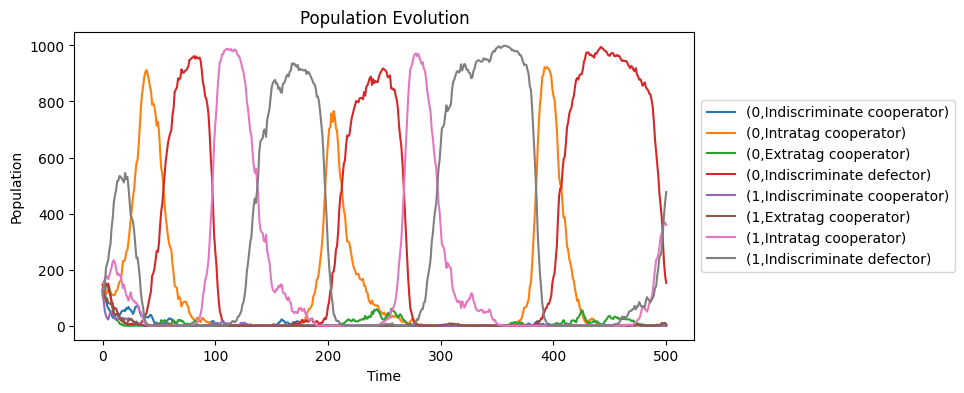

In [ ]:
allPlots(runSimulation(population_size, mutation_chance, 0.4, intensityofselection, payoff, 500), [], lineswithtags)

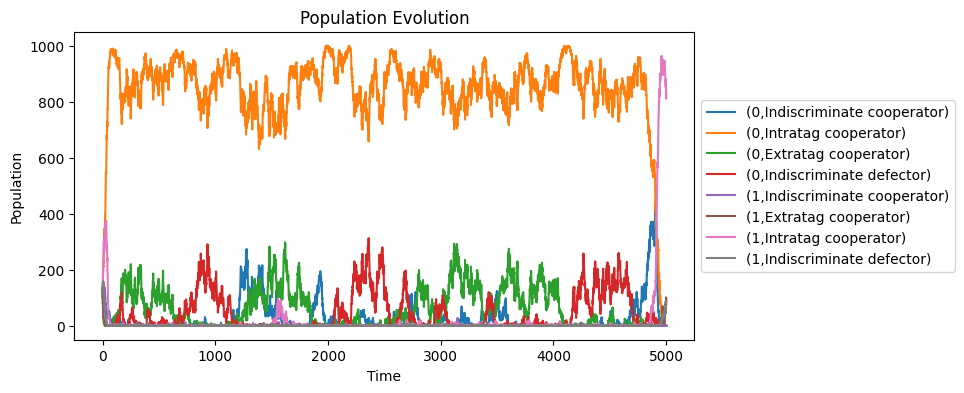

In [ ]:
population_size = 1000  # Has to always be an even number
mutation_chance = 0.001
intensityofselection = 0.5
r = 0.6

allPlots(runSimulation(population_size, mutation_chance, r, intensityofselection, payoff, 5000), [], lineswithtags)

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Strategies (Cooperate = 0, Defect = 1)
cooperate = 0
defect = 1

# Payoff matrix
#payoff = [[3, 0], [5, 1]]  # [R, S, T, P] = [3, 0, 5, 1]
b = 2
c = 1
payoff = [[b-c, -c], [b, 0]]  # [R, S, T, P] = [b-c, -c, b, 0]


# Run the Moran process for a given number of generations
num_simulations = 100
num_generations = 10000
population_size = 1000  # Has to always be an even number
mutation_chance = 0.001
intensityofselection = 0.1

r = 0.

allcronologies = []
rhistory = []
numcronologiestoplot = 1
cronologiestoplot = []
indexes = list(range(0,num_simulations,num_simulations//numcronologiestoplot))
for i in range(num_simulations):
  r += 1/num_simulations
  cronology = runSimulation(population_size, mutation_chance, r, intensityofselection, payoff, num_generations)
  if i in indexes:
    cronologiestoplot.append(cronology)
  allcronologies.append(countCronology(cronology,population_size))
  rhistory.append(r)


#print(countCronology(cronology,population_size))
allPlots(allcronologies, rhistory, historyrespectr)

for cronology in cronologiestoplot:
  allPlots(cronology, [], lineswithouttags)

KeyboardInterrupt: ignored

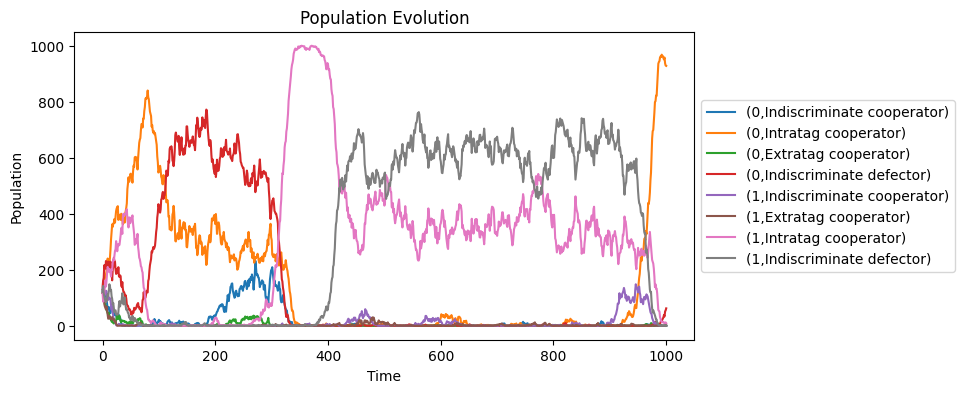

In [ ]:
population_size = 1000  # Has to always be an even number
mutation_chance = 0.001
intensityofselection = 0.5
r = 0.5

allPlots(runSimulation(population_size, mutation_chance, r, intensityofselection, payoff, 1000), [], lineswithtags)